In [31]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [44]:
init=pd.read_csv("../data/snmplabo/disk/init.csv")
used=pd.read_csv("../data/snmplabo/disk/used.csv")


In [45]:
init.sample(n=5,axis=1)

,/dev/shm,/run/media/admin/CentOS 7 x86_64,/boot,Virtual memory,/run/user/1028
0,4096,2048,4096,1024,4096
1,505835,4245165,259584,8109908,101167


In [34]:
init.sample(n=8,axis=1)

,/run,/sys/fs/cgroup,Memory buffers,/dev/shm,Virtual memory,/,/boot,/run/user/1035
0,4096,4096,1024,4096,1024,4096,4096,4096
1,505835,505835,4046680,505835,8109908,51123825,259584,101167


In [49]:
def transform(d,r=1e6):
    df=d.copy()
    uniti=init.iloc[0]
    df[uniti.index]=df[uniti.index].mul(uniti,axis=1)
    df[uniti.index]=df[uniti.index].div(r)
    return df  # valeur en Mb
    

In [50]:
total=transform(init.iloc[1:],r=1e6)
total.head(1)
used.columns

Index(['datetime', 'Physical memory', 'Virtual memory', 'Memory buffers',
       'Cached memory', 'Shared memory', 'Swap space', '/', '/dev/shm', '/run',
       '/sys/fs/cgroup', '/boot', '/run/user/42', '/run/user/1035',
       '/run/media/admin/CentOS 7 x86_64', '/run/user/1028'],
      dtype='object')

In [58]:
usedt=transform(used,r=1e6)
usedt['datetime']= mdates.num2date(mdates.datestr2num(usedt['datetime']))
usedt.head(6)

,datetime,Physical memory,Virtual memory,Memory buffers,Cached memory,Shared memory,Swap space,/,/dev/shm,/run,/sys/fs/cgroup,/boot,/run/user/42,/run/user/1035,/run/media/admin/CentOS 7 x86_64,/run/user/1028
0,2023-05-09 18:15:01+00:00,3748.196352,4437.987328,0.057344,1231.130624,208.539648,689.790976,59775.827968,0.0,211.083264,0.0,207.466496,0.004096,0.028672,8694.09792,0.0
1,2023-05-09 18:20:01+00:00,3751.276544,4441.055232,0.057344,1240.096768,216.928256,689.778688,59775.918080,0.0,219.471872,0.0,207.466496,0.004096,0.028672,8694.09792,0.0
2,2023-05-09 18:25:01+00:00,3756.503040,4446.281728,0.057344,1240.854528,216.928256,689.778688,59776.045056,0.0,219.471872,0.0,207.466496,0.004096,0.028672,8694.09792,0.0
3,2023-05-09 18:30:01+00:00,3743.846400,4431.544320,0.057344,1235.234816,210.587648,687.697920,59775.946752,0.0,211.050496,0.0,207.466496,0.004096,0.028672,8694.09792,0.0
4,2023-05-09 18:35:01+00:00,3738.091520,4425.789440,0.057344,1236.172800,210.587648,687.697920,59776.163840,0.0,219.439104,0.0,207.466496,0.004096,0.028672,8694.09792,0.0
5,2023-05-09 18:40:01+00:00,3718.402048,4406.095872,0.057344,1246.502912,218.976256,687.693824,59775.975424,0.0,219.439104,0.0,207.466496,0.004096,0.028672,8694.09792,0.0


In [63]:

date1 = mdates.num2date(mdates.datestr2num("2023-05-05")) 
date2 = mdates.num2date(mdates.datestr2num("2023-05-11"))
susedt=usedt[(usedt["datetime"] >= date1) & (usedt["datetime"] <= date2)]
dates = susedt['datetime']

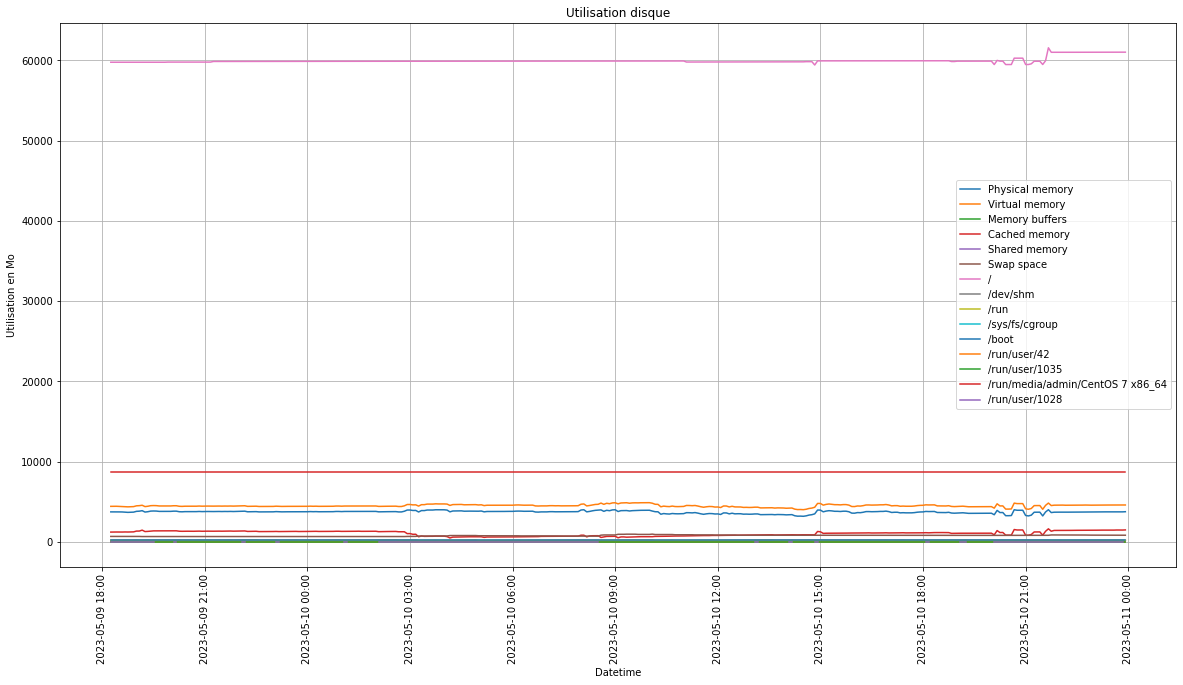

In [64]:
susedt2=susedt.drop('datetime',axis=1)
plt.figure(figsize=(20,10))
plt.plot(dates,susedt2)
plt.legend(init.iloc[0].index)
plt.title("Utilisation disque")
plt.xlabel("Datetime")
plt.ylabel("Utilisation en Mo")
plt.xticks(rotation="vertical")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%F %H:%M'))
plt.grid(visible=True)
plt.show()

In [162]:
def plot_pie(total,used,u="MB",t=""):
    total=round(total,1)
    used=round(used,1)
    disponible=total-used
    disponible=round(disponible.values[0],1)
    disponible = 0 if disponible <0 else disponible
    print(disponible)
    # Définir les étiquettes pour chaque part
    etiquettes = [f'Utilisé : {used}{u}', f'Disponible : {disponible}{u}']

    # Définir les couleurs pour chaque part
    print("kjkjkj",used/total.values[0])
    couleurs = [ 'red' if used/total.values[0] > 0.9  else 'blue', 'gray' ]

    # Créer le graphique de disque
    plt.pie([used,disponible], labels=etiquettes, colors=couleurs, startangle=90, autopct='%1.1f%%')

    # Ajouter un cercle blanc au centre pour créer un graphique de disque
    centre_cercle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_cercle)
    plt.title(f"Disque {t}")
    # Ajouter une légende
    plt.legend()

    # Afficher le graphique
    plt.show()
    

In [163]:
date = mdates.num2date(mdates.datestr2num("2023-05-10 03:15:01")) 
mai10 = usedt[usedt["datetime"]==date]
mai10
mai10["Physical memory"].values[0]


3734.540288

0.0
kjkjkj 1.0


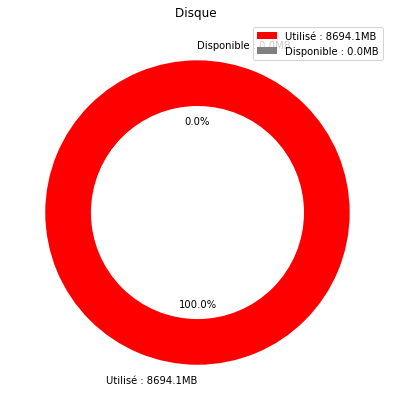

In [164]:

plot_pie(total["/run/media/admin/CentOS 7 x86_64"],mai10["/run/media/admin/CentOS 7 x86_64"].values[0])

149506.2
kjkjkj 0.28603669857958236


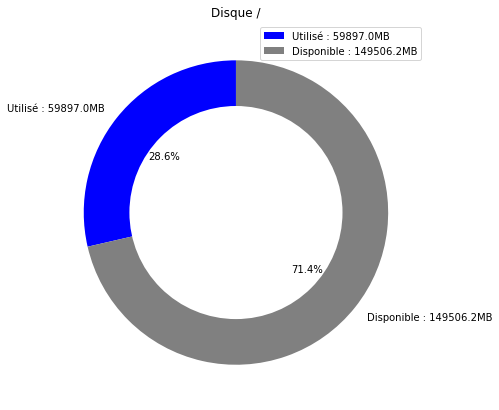

1860.9
kjkjkj 0.10183889183840919


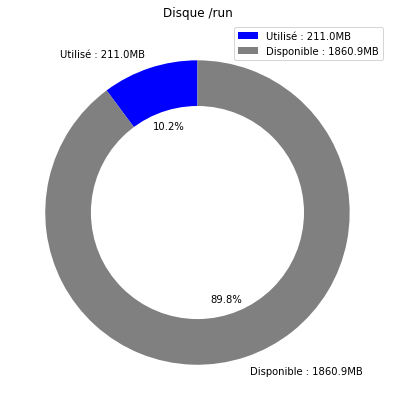

414.4
kjkjkj 0.0


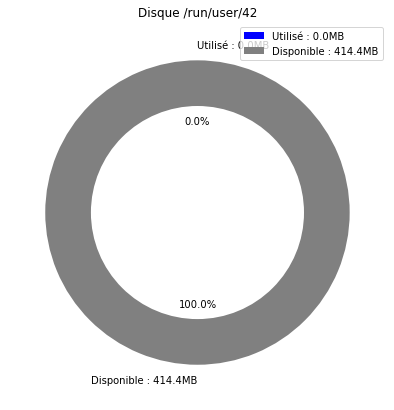

414.4
kjkjkj 0.0


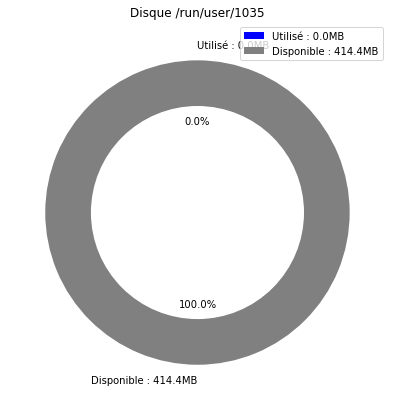

0.0
kjkjkj 1.0


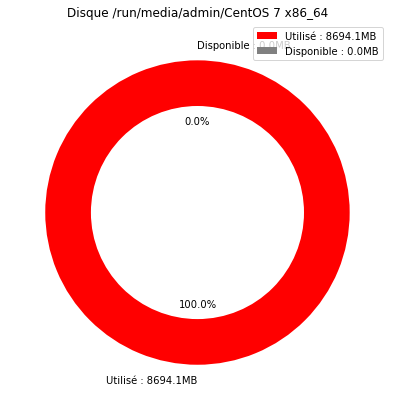

414.4
kjkjkj 0.0


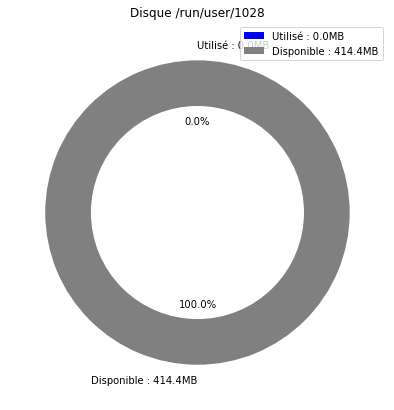

409.3
kjkjkj 0.9012259278922727


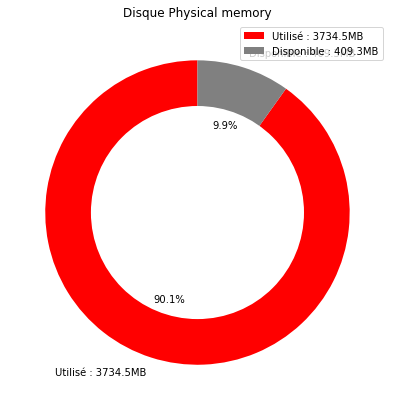

In [165]:
disk_to_print=["/",'/run',"/run/user/42","/run/user/1035","/run/media/admin/CentOS 7 x86_64","/run/user/1028","Physical memory"]

for i in  range(len(disk_to_print)) : 
    d=disk_to_print[i]
    plot_pie(total[d],mai10[d].values[0],t=d)

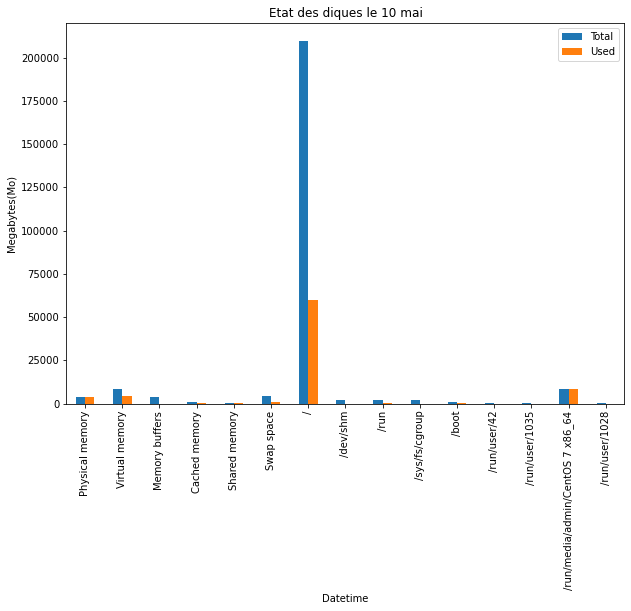

In [129]:

plt.rcParams["figure.figsize"] = (10, 7)
tobar=pd.DataFrame({"Total" : total.values[0] ,"Used" : mai10.iloc[0]},index=init.iloc[0].index)
tobar.plot.bar()
plt.title("Etat des diques le 10 mai")
plt.xlabel("Datetime")
plt.ylabel("Megabytes(Mo)")
plt.xticks(rotation="vertical")
#plt.grid(visible=True)
plt.show()

In [108]:
def print_dispo_used(disk,wt=False,p=plt,md=0):
    #p.figure(figsize=(20,10))
    if md==0 :
        p.figure(figsize=(20,10))
        p.title(f"Disk : {disk}")
       
    else :
        p.set_title(f"Disk : {disk}")

    if wt:
        p.plot(dates,usedt[disk],dates,[total[disk]]*len(dates))
    else :
        p.plot(dates,usedt[disk])
        
    p.legend(["Used","Total"])

    if md==0:
         p.show()
    
    
    

In [109]:
# print_dispo_used("/")

In [106]:
# disk_to_print=["/",'/run',"/run/user/42","/run/user/1035","/run/media/admin/CentOS 7 x86_64","/run/user/1028"]

# fig,axes = plt.subplots(3,2,figsize=(20,10))
# k=0
# for i in range(3) :
#     for j in range(2) : 
#         print_dispo_used(disk_to_print[k],p=axes[i][j],md=1)
#         k+=1
